In [1]:
from PIL import Image
import matplotlib.image as mpimg
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as KL
import tensorflow.keras.models as KM
from keras.callbacks import EarlyStopping
stop = EarlyStopping(monitor='loss', patience=3)

In [2]:
!wget http://images.cocodataset.org/zips/val2017.zip

--2025-01-29 19:42:12--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.25.127, 3.5.29.199, 16.15.192.238, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.25.127|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  95.4MB/s    in 8.1s    

2025-01-29 19:42:20 (95.6 MB/s) - ‘val2017.zip’ saved [815585330/815585330]



In [4]:
#!unzip 'val2017.zip'

In [5]:
len(os.listdir('val2017'))

5000

In [6]:
RGBImages = []
GrayImages = []
RGBTest = []
GrayTest = []
i=0
for image_file in os.listdir('val2017'):
    rgbimage = Image.open('val2017/'+image_file)
    grayimage = rgbimage.convert("L")
    rgbimage = rgbimage.resize((256,256))
    grayimage = grayimage.resize((256,256))

    if rgbimage.mode != 'RGB':
        rgbimage = rgbimage.convert('RGB')

    if i < 5:
        RGBTest.append(np.array(rgbimage, dtype='float64'))
        GrayTest.append(np.array(grayimage, dtype='float64'))
    elif i < 1005:
        RGBImages.append(np.array(rgbimage, dtype='float64'))
        GrayImages.append(np.array(grayimage, dtype='float64'))
    else:
        break
    i += 1

In [7]:
len(RGBImages), len(GrayImages), len(RGBTest), len(GrayTest)

(1000, 1000, 5, 5)

In [8]:
RGBImages = np.array(RGBImages,dtype='float64')
GrayImages = np.array(GrayImages,dtype='float64')
RGBTest = np.array(RGBTest,dtype='float64')
GrayTest = np.array(GrayTest,dtype='float64')

In [9]:
RGBImages.shape, GrayImages.shape, RGBTest.shape, GrayTest.shape

((1000, 256, 256, 3), (1000, 256, 256), (5, 256, 256, 3), (5, 256, 256))

In [10]:
GrayImages = np.expand_dims(GrayImages, axis=3)
GrayTest = np.expand_dims(GrayTest, axis=3)

In [11]:
RGBImages.shape, GrayImages.shape, RGBTest.shape, GrayTest.shape

((1000, 256, 256, 3), (1000, 256, 256, 1), (5, 256, 256, 3), (5, 256, 256, 1))

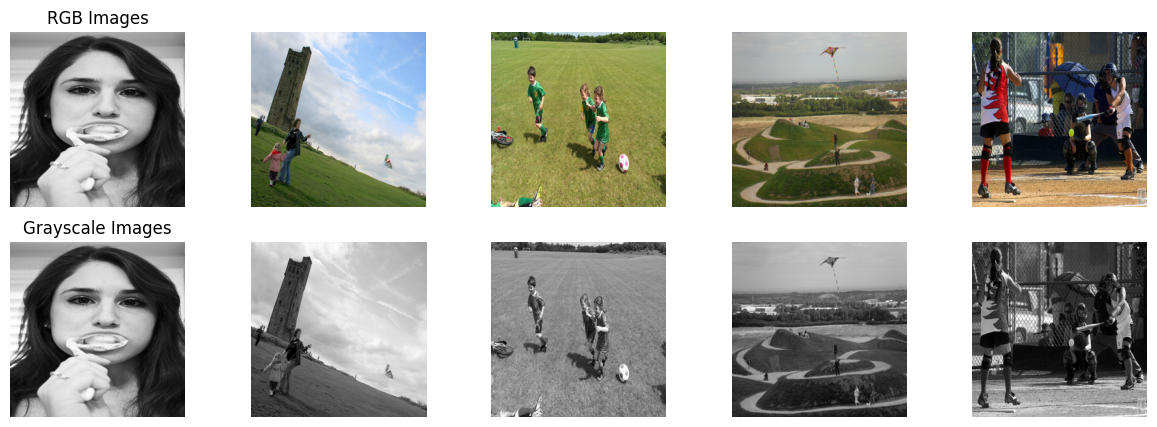

In [12]:
fig, axes = plt.subplots(2, 5, figsize=(15, 5))

for i in range(5):
    axes[0, i].imshow(RGBImages[i].astype(np.uint16))
    axes[0, i].axis('off')

for i in range(5):
    axes[1, i].imshow(GrayImages[i], cmap='gray')
    axes[1, i].axis('off')

axes[0, 0].set_title("RGB Images", fontsize=12)
axes[1, 0].set_title("Grayscale Images", fontsize=12)

plt.show()

In [16]:
inputs = KL.Input(shape=(256, 256, 1))

inc = KL.Conv2DTranspose(8, (3, 3), strides=(2,2),padding='same',activation=tf.nn.relu)(inputs)
inc = KL.Conv2DTranspose(16, (3, 3), strides=(2,2),padding='same',activation=tf.nn.relu)(inc)
#inc = KL.Conv2DTranspose(32, (3, 3), strides=(2,2),padding='same',activation=tf.nn.relu)(inc)

encoded = inc

dec = KL.Conv2D(16, (3,3), padding='same', activation=tf.nn.relu)(inc)
dec = KL.Conv2D(8, (3,3), padding='same', strides=(2,2), activation=tf.nn.relu)(dec)
#dec = KL.Conv2D(4, (3,3), padding='same', strides=(2,2), activation=tf.nn.relu)(dec)

decoded = KL.Conv2D(3, (3,3), padding='same', strides=(2,2), activation=tf.nn.relu)(dec)

In [17]:
model1 = KM.Model(inputs, decoded)

In [18]:
model1.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 512, 512, 8)         │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 1024, 1024, 16)      │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 1024, 1024, 16)      │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 512, 512, 8)         │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 256, 256, 3)         │             219 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,947 (19.32 KB)

 Trainable params: 4,947 (19.32 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model1.compile(optimizer='adam',loss='mae')

In [20]:
model1.fit(GrayImages, RGBImages,epochs=25,batch_size=50,callbacks=[stop])

Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 62s 778ms/step - loss: 109.1289
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 776ms/step - loss: 58.4957
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 776ms/step - loss: 19.0294
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 776ms/step - loss: 16.2610
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 778ms/step - loss: 16.1158
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 777ms/step - loss: 15.5654
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 777ms/step - loss: 15.3336
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 777ms/step - loss: 15.1722
Epoch 9/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 777ms/step - loss: 14.7192
Epoch 10/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 777ms/step - loss: 14.8264
Epoch 11/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 778ms/step - loss: 14.4454
Epoch 12/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 777ms/step - loss: 14.3894
Epoch 13/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 777ms/step - loss: 13.8910
Epoch 14/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 776ms/step - loss: 13.8281
Epoch 15/25
20/20 ━━━━━━━━━━

In [21]:
predict = model1.predict(GrayTest)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


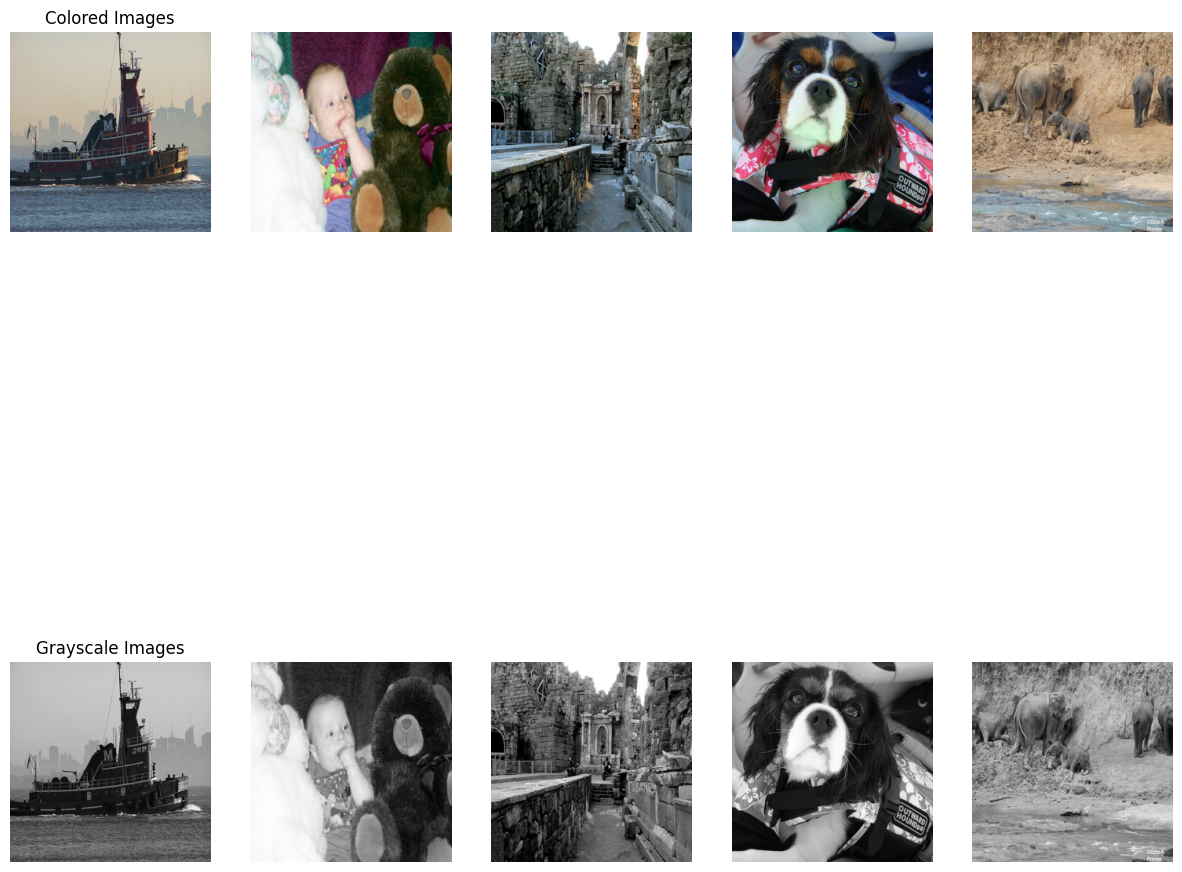

In [30]:
fig, axes = plt.subplots(2, 5, figsize=(15, 15))

for i in range(5):
    axes[0, i].imshow(RGBTest[i].astype(np.uint8))
    axes[0, i].axis('off')

for i in range(5):
    axes[1, i].imshow(GrayTest[i], cmap='gray')
    axes[1, i].axis('off')

axes[0, 0].set_title("Colored Images", fontsize=12)
axes[1, 0].set_title("Grayscale Images", fontsize=12)


plt.show()

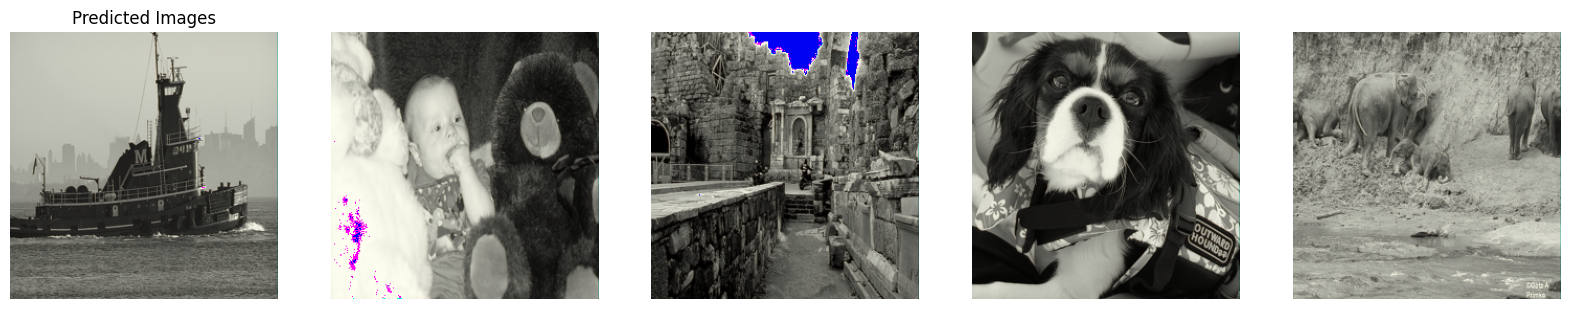

In [39]:
fig, axes = plt.subplots(1, 5, figsize=(20, 20))

for i in range(5):
    axes[i].imshow(predict[i].astype(np.uint8))
    axes[i].axis('off')

axes[0].set_title("Predicted Images", fontsize=12)
plt.show()